In [1]:
from symbulate import *
%matplotlib inline
from matplotlib import pyplot as plt

# Dice rolling example (sum and max of two rolls of a fair four-sided die)

In [2]:
P = BoxModel([1, 2, 3, 4], size = 2, replace = True)

In [3]:
P.sim(5)

0,"(2, 4)"
1,"(1, 3)"
2,"(4, 3)"
3,"(1, 1)"
4,"(4, 3)"


In [4]:
P.sim(10000).tabulate()

"(1, 1)",561
"(1, 2)",606
"(1, 3)",640
"(1, 4)",612
"(2, 1)",644
"(2, 2)",660
"(2, 3)",635
"(2, 4)",619
"(3, 1)",603
"(3, 2)",630
"(3, 3)",598


In [5]:
X = RV(P, sum)
Y = RV(P, max)

In [6]:
omega = (3, 2)
X(omega), Y(omega)

(5, 3)

In [7]:
y = Y.sim(100)
y

0,3
1,2
2,4
3,2
4,4
5,3
6,3
7,3
8,4
...,...
99,4


In [8]:
y.tabulate()

1,4
2,17
3,33
4,46
Total,100


In [9]:
y.tabulate(normalize = True)

1,0.04
2,0.17
3,0.33
4,0.46
Total,1.0


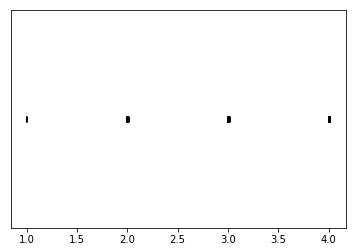

In [10]:
y.plot('rug')

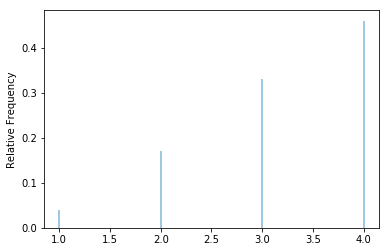

In [11]:
y.plot()

1,608
2,1906
3,3256
4,4230
Total,10000


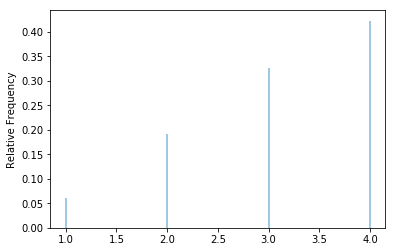

In [12]:
y = Y.sim(10000)
y.plot()
y.tabulate()

In [13]:
A = (Y < 3) # an event
A.sim(10000).tabulate()

False,7559
True,2441
Total,10000


In [14]:
B = (Y == 3) # an event
B.sim(10000).tabulate()

False,6970
True,3030
Total,10000


2,615
3,1258
4,1899
5,2449
6,1908
7,1238
8,633
Total,10000


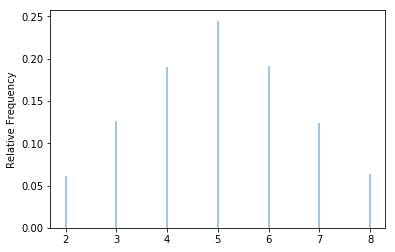

In [15]:
x = X.sim(10000)
x.plot()
x.tabulate()

In [16]:
xy = (X & Y).sim(10000)
xy

0,"(2, 1)"
1,"(3, 2)"
2,"(6, 4)"
3,"(5, 4)"
4,"(4, 3)"
5,"(5, 3)"
6,"(7, 4)"
7,"(4, 3)"
8,"(6, 3)"
...,...
9999,"(2, 1)"


In [17]:
xy.tabulate()

"(2, 1)",653
"(3, 2)",1195
"(4, 2)",645
"(4, 3)",1275
"(5, 3)",1276
"(5, 4)",1261
"(6, 3)",601
"(6, 4)",1213
"(7, 4)",1242
"(8, 4)",639
Total,10000


In [18]:
xy.tabulate(normalize = True)

"(2, 1)",0.0653
"(3, 2)",0.1195
"(4, 2)",0.0645
"(4, 3)",0.1275
"(5, 3)",0.1276
"(5, 4)",0.1261
"(6, 3)",0.0601
"(6, 4)",0.1213
"(7, 4)",0.1242
"(8, 4)",0.0639
Total,1.0


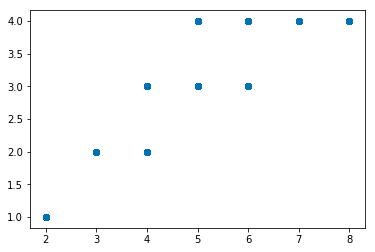

In [19]:
xy.plot()

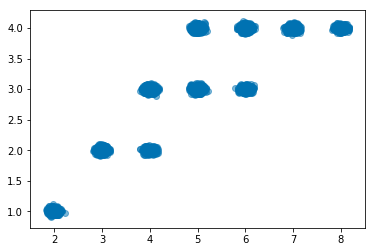

In [20]:
xy.plot(jitter = True)

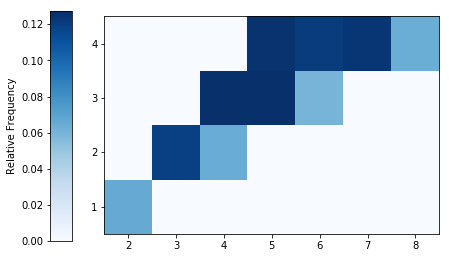

In [21]:
xy.plot('tile')

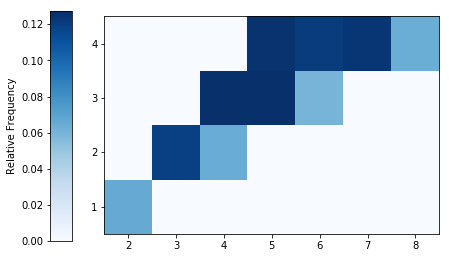

In [22]:
xy.plot(['tile', 'marginals'])

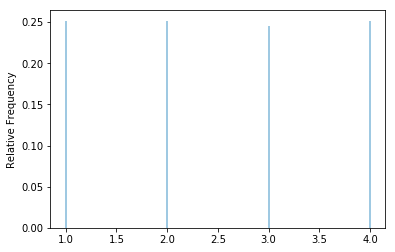

In [23]:
P = DiscreteUniform(a = 1, b = 4)
U = RV(P)
U.sim(10000).plot()

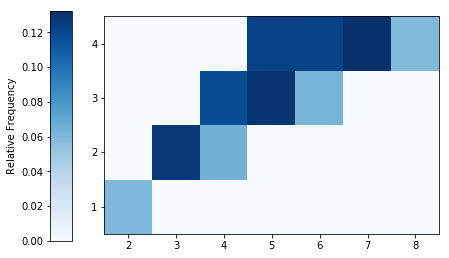

In [24]:
P = DiscreteUniform(a = 1, b = 4) ** 2
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).plot(['tile', 'marginals'])

# Simulation margin of error

In [25]:
n = 100
P = (DiscreteUniform(1, 4) ** 2).apply(sum) ** n
P.sim(5)

0,"(6, 8, 6, 4, 5, ..., 4)"
1,"(4, 7, 8, 6, 4, ..., 6)"
2,"(5, 5, 5, 5, 2, ..., 8)"
3,"(2, 8, 3, 7, 3, ..., 4)"
4,"(6, 5, 6, 3, 8, ..., 4)"


In [26]:
phat = RV(P, count_eq(6)) / n
phat.sim(5)

0,0.18
1,0.18
2,0.23
3,0.23
4,0.16


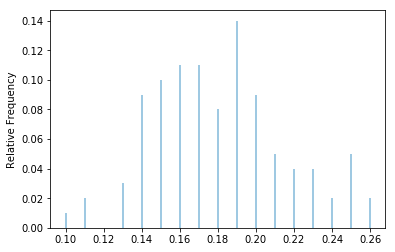

In [27]:
phat.sim(100).plot()

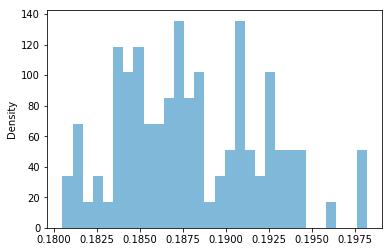

In [28]:
n = 10000
P = (DiscreteUniform(1, 4) ** 2).apply(sum) ** n
phat = RV(P, count_eq(6)) / n
phat.sim(100).plot()